## Imports and General Information

Dataset: ILINet.csv  
Output / classifier: %UNWEIGHTED ILI

In [ ]:
# Imports: General
import pandas as pd  # Used for dataframes and to read in csv
import numpy as np  # Used for math
import matplotlib.pyplot as plt  # Used for plots

# Imports: Random Forest
from sklearn.ensemble import RandomForestRegressor  # Used to activate random forest regression
from sklearn.model_selection import train_test_split  # Used to split training and testing data
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error  # Used to display mean squared error to evaluate our model
from sklearn.tree import plot_tree  # Used to create a visual tree for random forest

## Data Cleansing

Read in CSV file "ILINet.csv"

In [ ]:
ILINet = pd.read_csv("ILINet.csv")
ILINet.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,2010,40,1.10939,1.13505,2627,1677,X,3142,627,400,8473,1838,746485
1,National,X,2010,41,1.24341,1.25256,2953,1779,X,3522,649,444,9347,1875,746230
2,National,X,2010,42,1.25726,1.24570,3044,1898,X,3641,690,411,9684,1907,777397
3,National,X,2010,43,1.25734,1.26774,3226,1754,X,3822,682,420,9904,1929,781234
4,National,X,2010,44,1.43414,1.43723,3451,1981,X,4397,736,455,11020,1947,766753


Remove the columns that are all Xs (NAs), as well as any rows that are NA

In [ ]:
# Remove all X columns ("REGION" and "AGE 25-64")
ILINet = ILINet.drop(columns = ["REGION", "AGE 25-64"])

# Remove all rows with Xs
ILINet = ILINet[ILINet != "X"]

# Remove "REGION TYPE" since it's only filled with "National"
ILINet = ILINet.drop(columns = ["REGION TYPE"])

In [ ]:
ILINet.head()

,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,2010,40,1.10939,1.13505,2627,1677,3142,627,400,8473,1838,746485
1,2010,41,1.24341,1.25256,2953,1779,3522,649,444,9347,1875,746230
2,2010,42,1.25726,1.24570,3044,1898,3641,690,411,9684,1907,777397
3,2010,43,1.25734,1.26774,3226,1754,3822,682,420,9904,1929,781234
4,2010,44,1.43414,1.43723,3451,1981,4397,736,455,11020,1947,766753


Split the data into X (predictors) and y (target)

X: Everything except "%UNWEIGHTED ILI"  
y: "%UNWEIGHTED ILI"

In [ ]:
X = ILINet.drop(columns = ["%UNWEIGHTED ILI"])
y = ILINet["%UNWEIGHTED ILI"]

Split the data into training and testing data for our regressor model

The most recent 20% of years should be testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = False)

## Random Forest Regressor
Create random forest model shell, then train the model using our data, then predict our testing data using the model


In [ ]:
RandomForest = RandomForestRegressor(n_estimators = 100, random_state = 123)

Train, or fit, our model using `X_train` and `y_train`

In [ ]:
RandomForest.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

Now that our model is fitted, we use our model on our `X_test` data and see its results

In [ ]:
y_prediction = RandomForest.predict(X_test)
y_prediction

array([2.2428991 , 2.3445482 , 2.5955413 , 2.9948731 , 3.3467342 ,
       4.5666684 , 5.5049598 , 5.9630203 , 6.2462724 , 7.5868451 ,
       7.2228827 , 7.2033341 , 7.0204621 , 6.2786353 , 5.5719227 ,
       4.1300884 , 2.9700545 , 2.6656145 , 2.6306349 , 2.5754909 ,
       2.5664337 , 2.57605   , 2.5787466 , 2.5078023 , 2.389306  ,
       2.3984547 , 2.2828427 , 2.2496735 , 2.1838059 , 1.9966747 ,
       1.9159126 , 1.9159126 , 1.9212981 , 1.9225993 , 1.8744603 ,
       1.7788559 , 1.7873235 , 1.4948236 , 1.4340109 , 1.3748286 ,
       1.3171351 , 1.257508  , 1.1621934 , 1.1369382 , 1.1938988 ,
       1.2514178 , 1.3201908 , 1.3748076 , 1.6870817 , 1.9193    ,
       1.9982839 , 1.928699  , 2.0280999 , 2.0293381 , 2.2859043 ,
       2.3975948 , 2.5795138 , 2.7445258 , 3.0003448 , 3.4552777 ,
       3.5399929 , 4.1480301 , 4.2003465 , 4.5408524 , 5.4547029 ,
       6.4768642 , 7.1888652 , 5.9090804 , 4.8774098 , 4.5594435 ,
       4.2857592 , 4.5530429 , 4.5566802 , 4.5519824 , 4.55650

`y_predict` is our model's prediction of what the `y_test` values should be, given our `X_train` and `y_train`

Use mean squared error to evaluate our model, and determine how accurate it is

## Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_prediction)
mse

0.02581344060517198

With an MSE of `0.02581344060517198`, that means our model's predictions are - on average - 0.0258 units off from the true values

In the context of our model, that means it predicts "%UNWEIGHTED ILI" percentages that are on average 0.0257% off

Visualize the decision tree the random forest regressor came up with

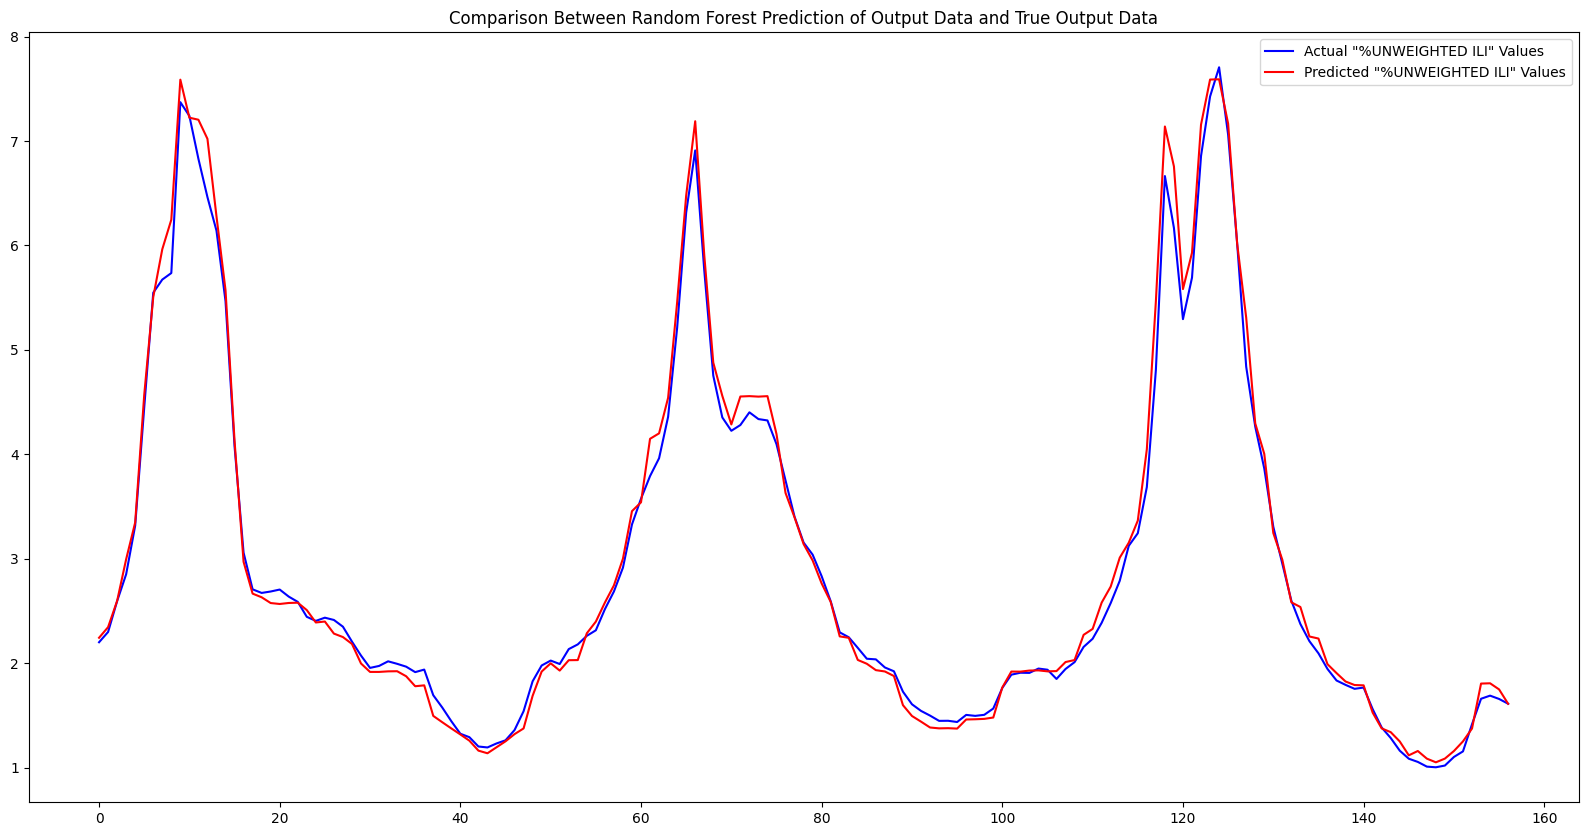

In [ ]:
# Create x and y axes for line graph for "y_test"
x_axis = np.arange(len(y_test))
y_axis = y_test

plt.figure(figsize = (20, 10))  # Make window larger

# Create a line plot for the "y_test"
plt.plot(x_axis, y_axis, color = "blue", label = 'Actual "%UNWEIGHTED ILI" Values')

# Create x and y axes for line graph for "y_prediction"
x_axis = np.arange(len(y_prediction))
y_axis = y_prediction

# Add a line for the "y_prediction" onto the graph
plt.plot(x_axis, y_axis, color = "red", label = 'Predicted "%UNWEIGHTED ILI" Values')

plt.legend()  # Display legend
plt.title("Comparison Between Random Forest Prediction of Output Data and True Output Data")  # Display title


# Display line plot
plt.show()